In [3]:
# import sidmodel.basic_model as basic_model
# import sidmodel.greedy_influencer_model as advanced_model
from sidmodel.deinfluencer_selection import InfluenceDeinfluenceModel

import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sidmodel'

In [ ]:
# Create a sample graph
G = nx.erdos_renyi_graph(100, 0.03, directed=True)
#G = nx.barabasi_albert_graph(100, 3).to_directed()

In [ ]:
# Initialize the InfluenceDeinfluenceModel
model = InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 8
influencers = model.greedy_hill_climbing(k, steps=10)
model.set_influencers(influencers)

In [ ]:
# Rank nodes using different centrality measures
k_deinfluencers = 5

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)


In [ ]:
print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)

Degree Centrality Ranking: [85, 24, 29, 47, 71]
Closeness Centrality Ranking: [49, 99, 44, 85, 25]
Betweenness Centrality Ranking: [85, 33, 29, 17, 61]
Eigenvector Centrality Ranking: [72, 33, 61, 85, 79]
PageRank Centrality Ranking: [33, 65, 44, 49, 43]


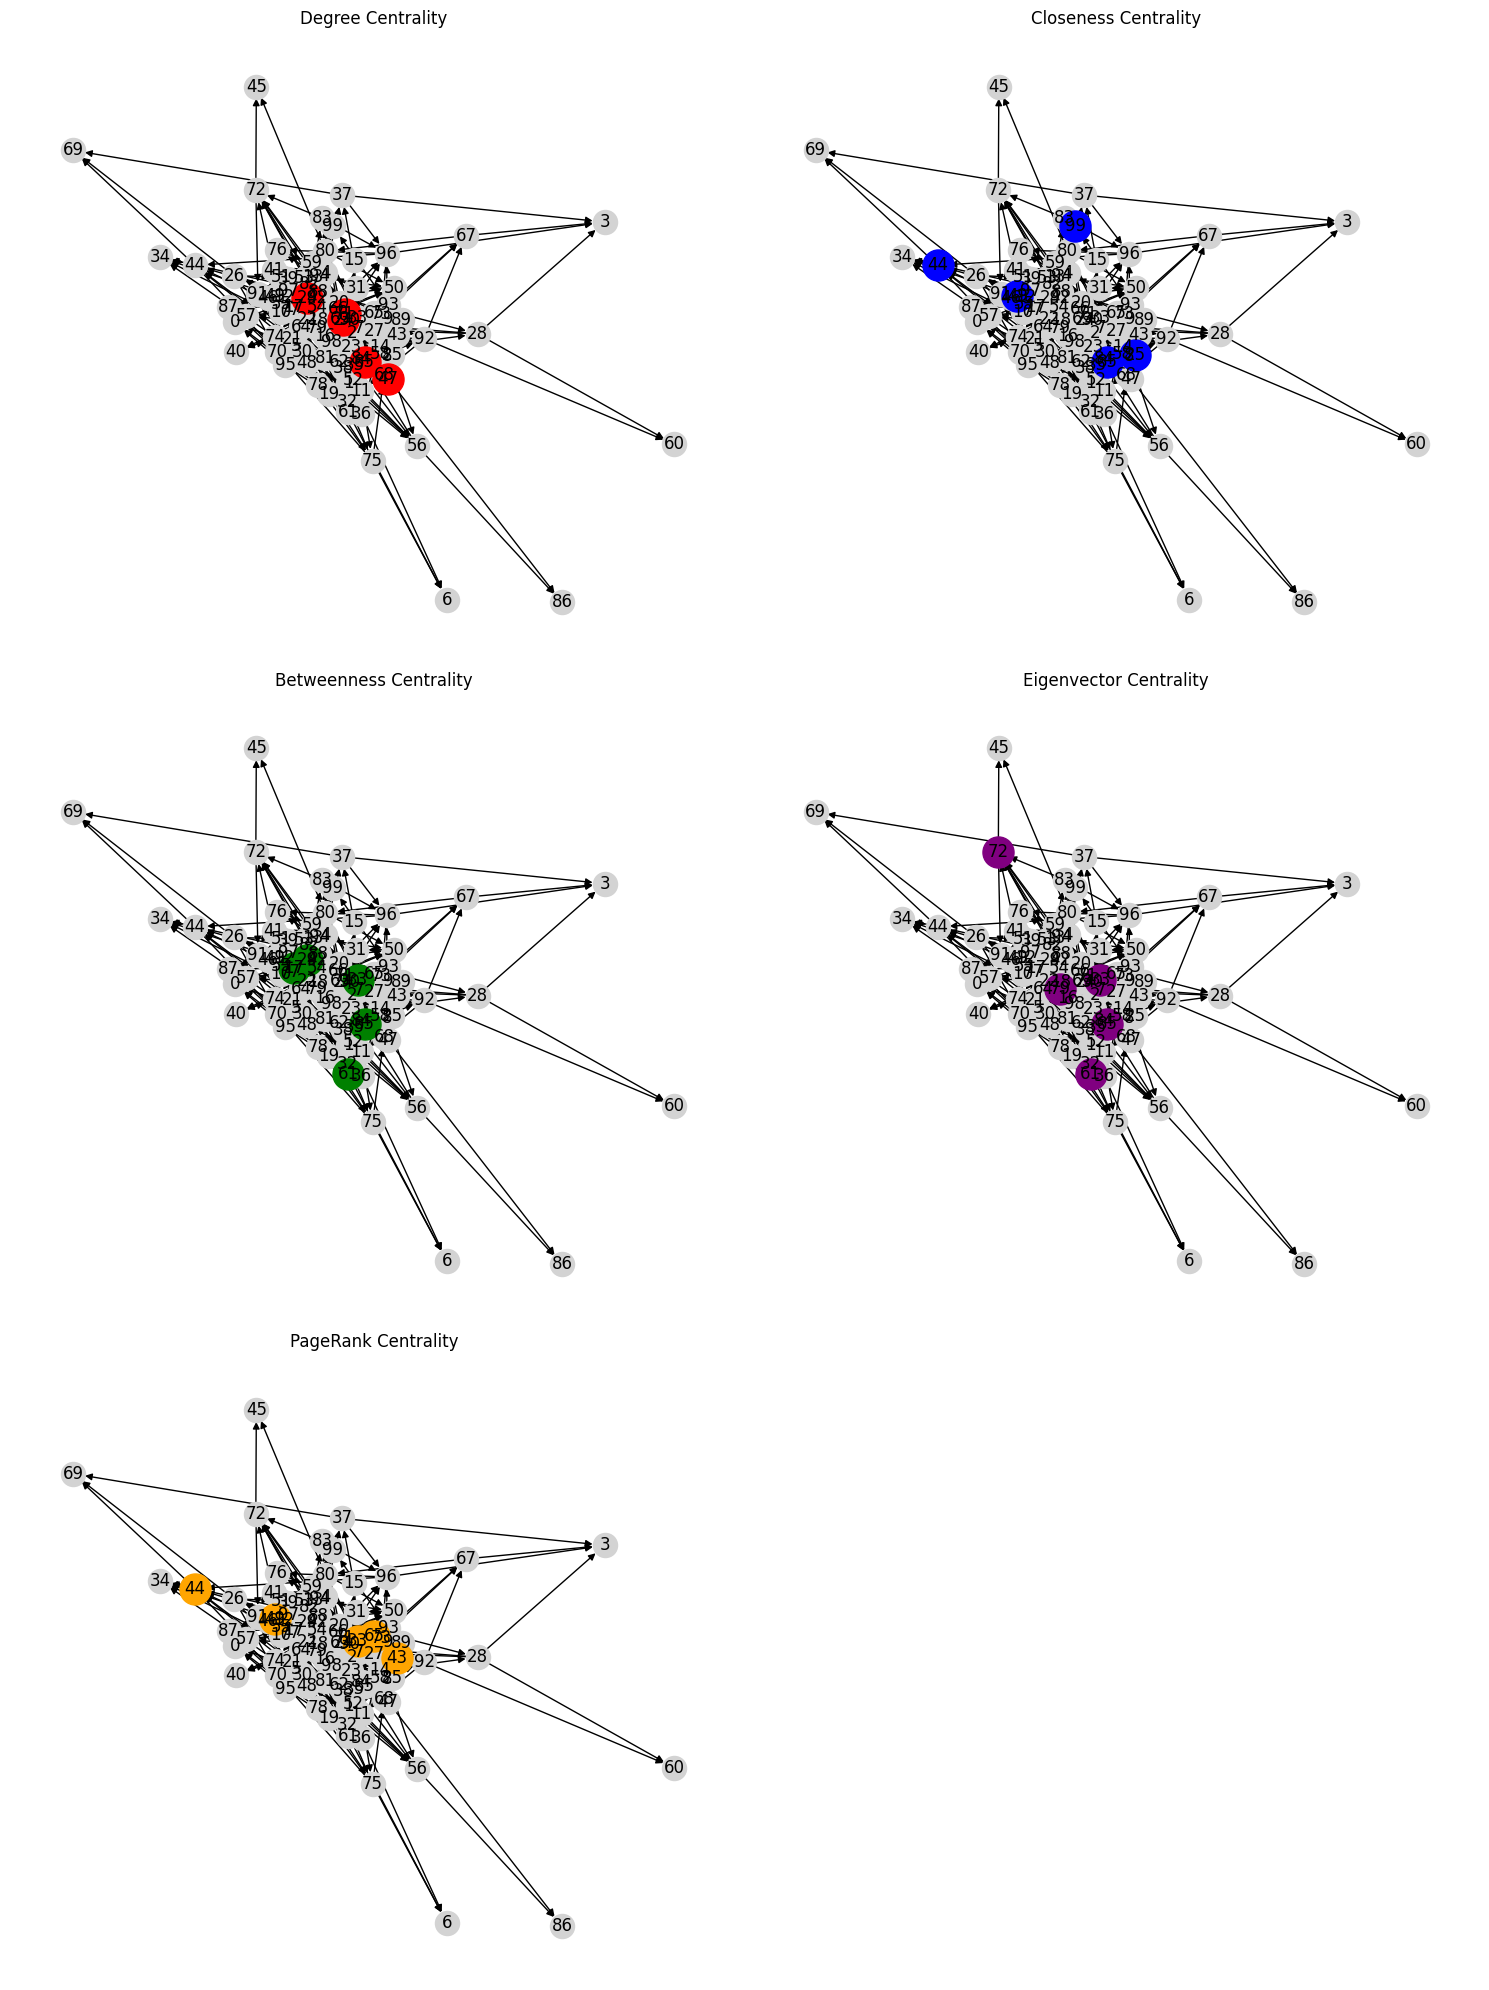

In [ ]:
def plot_rankings_subplots(graph, rankings):
    pos = nx.spring_layout(graph)
    color_map = {
        'Degree Centrality': 'red',
        'Closeness Centrality': 'blue',
        'Betweenness Centrality': 'green',
        'Eigenvector Centrality': 'purple',
        'PageRank Centrality': 'orange'
    }
    
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, (centrality, nodes) in enumerate(rankings.items()):
        ax = axs[i]
        ax.set_title(centrality)
        nx.draw(graph, pos, with_labels=True, node_color='lightgrey', ax=ax)
        nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=color_map[centrality], ax=ax, node_size=500, label=centrality)
    
    # Remove the unused subplot
    fig.delaxes(axs[-1])
    
    plt.tight_layout()
    plt.show()

rankings = {
    'Degree Centrality': degree_centrality_ranking,
    'Closeness Centrality': closeness_centrality_ranking,
    'Betweenness Centrality': betweenness_centrality_ranking,
    'Eigenvector Centrality': eigenvector_centrality_ranking,
    'PageRank Centrality': pagerank_centrality_ranking
}

plot_rankings_subplots(G, rankings)


In [ ]:
G = nx.erdos_renyi_graph(100, 0.05, directed=True)

# Initialize the InfluenceDeinfluenceModel
model = InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 5
influencers = model.greedy_hill_climbing(k, steps=5)

print("Influencers:", influencers)

Influencers: {34, 3, 37, 73, 22}


In [ ]:
# Function to run cascade and count deinfluenced nodes
def count_deinfluenced(model, influencers, deinfluencers, num_runs, steps=10):
    total_deinfluenced = 0
    for _ in range(num_runs):
        model.set_initial_states()
        model.set_influencers(influencers)
        model.set_deinfluencers(deinfluencers)
        model.run_cascade(steps)
        total_deinfluenced += model.count_deinfluenced()
    avg_deinfluenced = total_deinfluenced / num_runs
    return avg_deinfluenced

# Rank nodes using different centrality measures
k_deinfluencers = 5

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)

print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)

# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 1000  # Number of times to run the cascade for averaging
steps = 10
results = {
    'Degree': count_deinfluenced(model, influencers, degree_centrality_ranking, num_runs, steps=steps),
    'Closeness': count_deinfluenced(model, influencers, closeness_centrality_ranking, num_runs, steps=steps),
    'Betweenness': count_deinfluenced(model, influencers, betweenness_centrality_ranking, num_runs, steps=steps),
    'Eigenvector': count_deinfluenced(model, influencers, eigenvector_centrality_ranking, num_runs, steps=steps),
    'PageRank': count_deinfluenced(model, influencers, pagerank_centrality_ranking, num_runs, steps=steps)
}

Degree Centrality Ranking: [22, 41, 93, 12, 19]
Closeness Centrality Ranking: [93, 17, 19, 85, 76]
Betweenness Centrality Ranking: [93, 81, 58, 22, 12]
Eigenvector Centrality Ranking: [93, 5, 76, 57, 85]
PageRank Centrality Ranking: [33, 81, 93, 23, 46]


Degree: 5.12 nodes deinfluenced on average
Closeness: 5.02 nodes deinfluenced on average
Betweenness: 5.00 nodes deinfluenced on average
Eigenvector: 5.00 nodes deinfluenced on average
PageRank: 5.00 nodes deinfluenced on average


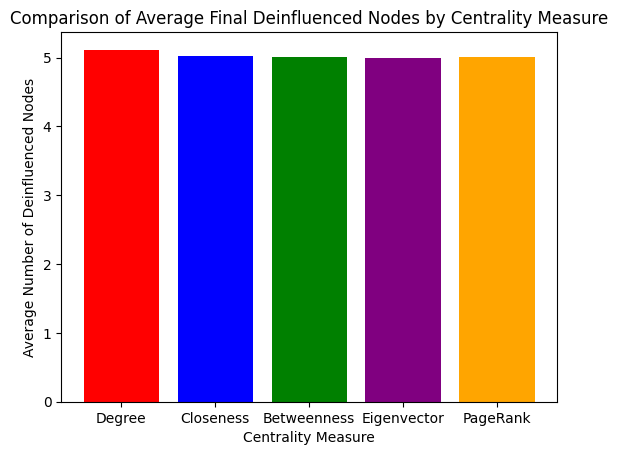

In [ ]:
# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

In [ ]:
G = nx.erdos_renyi_graph(100, 0.05, directed=True)

# Initialize the InfluenceDeinfluenceModel
model = InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 5
influencers = model.greedy_hill_climbing(k, steps=5)

print("Influencers:", influencers)

Influencers: {35, 9, 73, 80, 51}


Degree: 22.40 nodes deinfluenced on average
Closeness: 10.80 nodes deinfluenced on average
Betweenness: 13.40 nodes deinfluenced on average
Eigenvector: 10.00 nodes deinfluenced on average
PageRank: 11.20 nodes deinfluenced on average


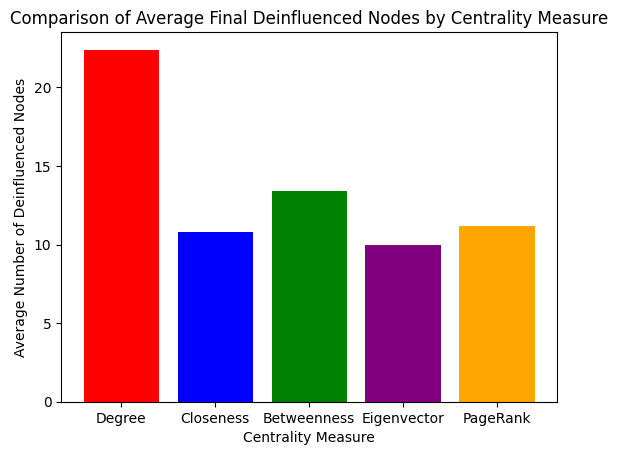

In [ ]:
# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, influencers, deinfluencers, num_runs=10):
    total_deinfluenced = 0
    for _ in range(num_runs):
        model.set_initial_states()
        model.set_influencers(influencers)
        model.set_deinfluencers(deinfluencers)
        model.run_cascade(steps=10)  # Run cascade for 10 steps
        #model.display_graphs_grid()
        total_deinfluenced += sum(1 for node in model.graph.nodes if model.graph.nodes[node]['state'] == 'D')
        model.set_initial_states()
    return total_deinfluenced / num_runs

# Initialize the model
model.set_initial_states()

# Rank nodes using different centrality measures
k_deinfluencers = 10

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)

# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 10  # Number of times to run the cascade for averaging

results = {
    'Degree': count_deinfluenced(model, influencers, degree_centrality_ranking, num_runs),
    'Closeness': count_deinfluenced(model, influencers, closeness_centrality_ranking, num_runs),
    'Betweenness': count_deinfluenced(model,influencers, betweenness_centrality_ranking, num_runs),
    'Eigenvector': count_deinfluenced(model, influencers, eigenvector_centrality_ranking, num_runs),
    'PageRank': count_deinfluenced(model, influencers, pagerank_centrality_ranking, num_runs)
}

# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

In [ ]:
# Generate the graph
G = nx.erdos_renyi_graph(100, 0.05, directed=True)
# G = nx.barabasi_albert_graph(50, 3).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 5
steps = 10
influencers = model.greedy_hill_climbing(k, steps=steps)
model.set_initial_states()

print("Influencers:", influencers)

# for node in G.nodes:
#     print(node, G.nodes[node]['state'])

Influencers: {32, 71, 74, 21, 86}


Degree Centrality Ranking: [80, 81, 17]
Closeness Centrality Ranking: [81, 80, 18]
Betweenness Centrality Ranking: [80, 71, 38]
Eigenvector Centrality Ranking: [81, 18, 80]
PageRank Centrality Ranking: [80, 81, 48]
3
Run 1/10: 3 nodes deinfluenced
Total deinfluenced nodes: 3
3
Run 2/10: 3 nodes deinfluenced
Total deinfluenced nodes: 6
3
Run 3/10: 3 nodes deinfluenced
Total deinfluenced nodes: 9
3
Run 4/10: 3 nodes deinfluenced
Total deinfluenced nodes: 12
3
Run 5/10: 3 nodes deinfluenced
Total deinfluenced nodes: 15
3
Run 6/10: 3 nodes deinfluenced
Total deinfluenced nodes: 18
3
Run 7/10: 3 nodes deinfluenced
Total deinfluenced nodes: 21
3
Run 8/10: 3 nodes deinfluenced
Total deinfluenced nodes: 24
3
Run 9/10: 3 nodes deinfluenced
Total deinfluenced nodes: 27
3
Run 10/10: 3 nodes deinfluenced
Total deinfluenced nodes: 30
Average deinfluenced nodes: 3.0
3
Run 1/10: 3 nodes deinfluenced
Total deinfluenced nodes: 3
3
Run 2/10: 3 nodes deinfluenced
Total deinfluenced nodes: 6
3
Run 3/10: 3

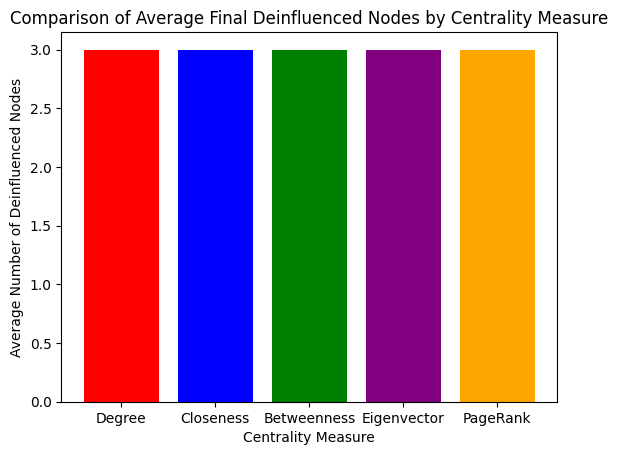

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1179c0e00> (for post_execute):


ValueError: Image size of 1500x275000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x275000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x275000 with 1650 Axes>

In [ ]:
# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, inf, deinf, num_runs=15):
    total_deinfluenced = 0
    for run in range(num_runs):
        model.historic_states = []
        model.set_initial_states()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps=10)
        deinfluenced_count = model.count_deinfluenced()
        print(deinfluenced_count)
        print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        
        total_deinfluenced += deinfluenced_count
        print(f"Total deinfluenced nodes: {total_deinfluenced}")
        
    average_deinfluenced = total_deinfluenced / num_runs
    print(f"Average deinfluenced nodes: {average_deinfluenced}")
    model.historic_states = []
    model.set_initial_states()
    return average_deinfluenced

# Initialize the model
model.set_initial_states()

# Rank nodes using different centrality measures
k_deinfluencers = 3

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)


print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)


# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 10  # Number of times to run the cascade for averaging

results = {
    'Degree': count_deinfluenced(model, influencers, degree_centrality_ranking, num_runs),
    'Closeness': count_deinfluenced(model, influencers, closeness_centrality_ranking, num_runs),
    'Betweenness': count_deinfluenced(model, influencers, betweenness_centrality_ranking, num_runs),
    'Eigenvector': count_deinfluenced(model, influencers, eigenvector_centrality_ranking, num_runs),
    'PageRank': count_deinfluenced(model, influencers, pagerank_centrality_ranking, num_runs)
}

# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

model.display_graphs_grid()
